Indira Septianita Larasati

H071191023

Pemrosesan Data Citra 

Citra merupakan informmasi berbentuk visual. Data digital dipresenrasikan dalam komputer berupa kode biner dan desimal seperti mp3, gif, jpg. 

Adapun prosedur Pengolahan Data Citra sendiri disini terdiri:
1. Import Data
2. Menampilkan Citra
3. Data generator
4. denoising

In [1]:
# import library yg akan kita gunakan

import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2
import numpy as np
import os
from PIL import Image

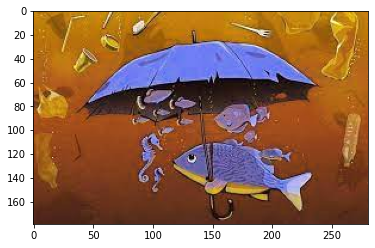

In [12]:
image = cv2.imread('/content/drive/MyDrive/Data Mining/gambar datamining/images.jpg') #membaca (load) folder file  
plt.imshow(image) # menammpilkan gambar



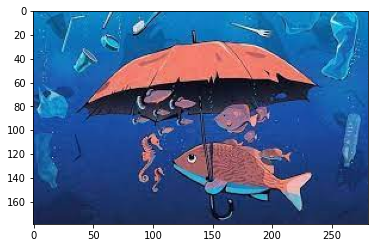

In [13]:
image_cvtresult = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #mengonversi warna gambar dengan menggunakan cvtColor openCV.

plt.imshow(image_cvtresult)# menammpilkan gambar dari hasil konversi gamber menggunakan cvtColor openCV.


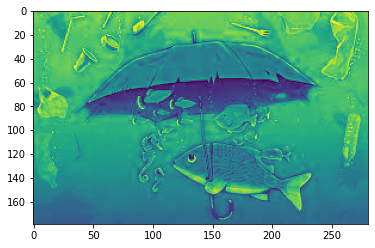

In [14]:
r,g,b = cv2.split(image_cvtresult)
plt.imshow(b)

In [15]:
#mengubah citra ke array


image_array = img_to_array(image_cvtresult)
print(image_array)



[[[ 20. 131. 187.]
  [ 20. 131. 187.]
  [ 21. 131. 190.]
  ...
  [ 12. 120. 193.]
  [  9. 117. 192.]
  [ 17. 127. 206.]]

 [[ 16. 126. 185.]
  [ 21. 131. 190.]
  [ 26. 136. 195.]
  ...
  [ 15. 123. 196.]
  [ 12. 120. 195.]
  [ 17. 127. 204.]]

 [[ 28. 141. 201.]
  [ 27. 140. 200.]
  [ 20. 133. 193.]
  ...
  [ 18. 126. 199.]
  [ 17. 125. 200.]
  [ 17. 127. 204.]]

 ...

 [[ 30.  42.  82.]
  [ 29.  41.  79.]
  [ 28.  40.  80.]
  ...
  [ 28.  43.  84.]
  [ 28.  43.  84.]
  [ 28.  43.  84.]]

 [[ 29.  43.  80.]
  [ 28.  42.  79.]
  [ 27.  41.  78.]
  ...
  [ 28.  43.  84.]
  [ 28.  43.  84.]
  [ 28.  43.  84.]]

 [[ 29.  43.  80.]
  [ 28.  42.  79.]
  [ 27.  41.  78.]
  ...
  [ 28.  43.  84.]
  [ 28.  43.  84.]
  [ 28.  43.  84.]]]


 convert color citra yang lain

In [16]:
## Mengubah citra dari bgr ke gray namun perlu dirubah dari gray ke rgb lagi

fig = plt.figure(num = None, figsize=(8, 8))

image_grayscale_temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_grayscale = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)

# Merubah citra dari rgb ke hsv

image_hsv = cv2.cvtColor(image_cvtresult, cv2.COLOR_RGB2HSV)



<Figure size 576x576 with 0 Axes>

Membandingkan 4 jenis color

<function matplotlib.pyplot.show>

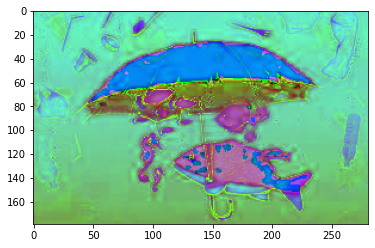

In [17]:
ax = fig.add_subplot(2, 2, 1)
plt.imshow(image)

ax = fig.add_subplot(2, 2, 2)
plt.imshow(image_cvtresult)

ax = fig.add_subplot(2, 2, 3)
plt.imshow(image_grayscale)

ax = fig.add_subplot(2, 2, 4)
plt.imshow(image_hsv)

plt.show

<function matplotlib.pyplot.show>

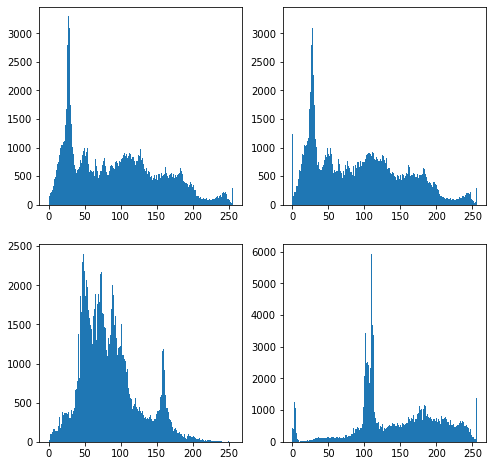

In [18]:
#Menampilkan histogram dari ke 4 jenis color pada citra sebelumnya

fig = plt.figure(num = None, figsize=(8, 8))

image_grayscale_temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_grayscale = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)
# Image hsv

image_hsv = cv2.cvtColor(image_cvtresult, cv2.COLOR_RGB2HSV)

#Image BGR

ax = fig.add_subplot(2, 2, 1)
plt.hist(image.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 2)
plt.hist(image_cvtresult.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 3)
plt.hist(image_grayscale.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 4)
plt.hist(image_hsv.ravel(),256,[0,256])

plt.show

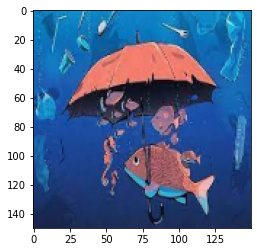

In [19]:
image_resize = cv2.resize(image_cvtresult, (150, 150))
plt.imshow(image_resize)

In [21]:
#Membuat direktori

base_directory = '/content/'
augmented_directory = os.path.join(base_directory, "augmented_result")
os.mkdir(augmented_directory)

In [22]:
datagen = ImageDataGenerator(
    rotation_range = 45,
    width_shift_range = 0.5
)

In [23]:
#Membaca suatu citra di suatu direktori dan merubah ukurannya jadi 150x150 kemudian merubahnya jadi array

#/content/augmented_result
path = "/content/drive/MyDrive/Data Mining/gambar datamining"
size = 150
dataset = []
image_dir = os.listdir(path)

img = io.imread(f"{path}/{image_dir[0]}")
img = Image.fromarray(img, 'RGB')
img = img.resize((size, size))
dataset.append(np.array(img))
x = np.array(dataset)

In [26]:
#Membuat beberapa citra hasil augmentasi dari citra sebelumnya dan disimpan di direktori yang telah dibuat sebelumnya
i = 0
for j in datagen.flow(x, batch_size = 32,
                      save_to_dir = "/content/augmented_result/",
                      save_prefix = "aug_rslt",
                      save_format = "jpg"):

  i += 1
  if i > 30:
    break

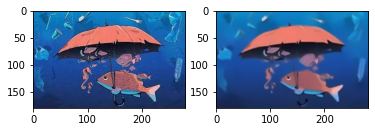

In [25]:
image1 = cv2.GaussianBlur(image_cvtresult, (3,3), 0)
rgb_dst = cv2.fastNlMeansDenoisingColored(image1, None, 10, 10, 7, 21)

plt.subplot(121),plt.imshow(image_cvtresult)
plt.subplot(122),plt.imshow(rgb_dst)

plt.show()